# RECOMMENDATION SYSTEM


## Background

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

## Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

## What recommeder system can solve ?

It can help the user to find the right product.
It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.
Types of recommendations
There are mainly 6 types of the recommendations systems :-

1. **Popularity based systems** :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

2. **Classification model based**:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.

3. **Content based recommedations**:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

4. **Collaberative Filtering**:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. **Hybrid Approaches**:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. **Association rule mining** :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.


### Attribute Information:

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

Import Libraries

### Importing requried laibraries:

In [2]:
import numpy as np 
import pandas as pd 
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
# Loading the Dataframe

mobiles = pd.read_csv('C:/Users/Rakesh/Downloads/Recommendation-Engine-master1/Recommendation-Engine-master/Files/mobile-reviews & iteam Merged.csv')
mobiles.head(5)

,productId,brand,title,Product_rating,totalReviews,price,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,0.0,Janet,10001,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,0.0,Luke Wyatt,10002,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,0.0,Brooke,10003,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,0.0,amy m. teague,10004,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,0.0,tristazbimmer,10005,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


## DataFrame info:

In [3]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67971 entries, 0 to 67970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productId       67971 non-null  object 
 1   brand           67971 non-null  object 
 2   title           67971 non-null  object 
 3   Product_rating  67971 non-null  float64
 4   totalReviews    67971 non-null  int64  
 5   price           67971 non-null  float64
 6   originalPrice   67971 non-null  float64
 7   name            67969 non-null  object 
 8   userId          67971 non-null  object 
 9   User_rating     67971 non-null  int64  
 10  date            67971 non-null  object 
 11  verified        67971 non-null  bool   
 12  title.1         67960 non-null  object 
 13  body            67971 non-null  object 
 14  helpfulVotes    27215 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(8)
memory usage: 7.3+ MB


In [4]:
#Five point summary for Product_rating oveall mobile dataset

mobiles.describe()['Product_rating'].T

count    67971.000000
mean         3.766790
std          0.429212
min          1.000000
25%          3.500000
50%          3.800000
75%          4.100000
max          5.000000
Name: Product_rating, dtype: float64

In [5]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(mobiles.Product_rating.min()))
print('Maximum rating is: %d' %(mobiles.Product_rating.max()))

Minimum rating is: 1
Maximum rating is: 5


## Handling Missing values

In [6]:
#Check for missing values
print('Number of missing values across columns: \n',mobiles.isnull().sum())

Number of missing values across columns: 
 productId             0
brand                 0
title                 0
Product_rating        0
totalReviews          0
price                 0
originalPrice         0
name                  2
userId                6
User_rating           0
date                  0
verified              0
title.1              11
body                  0
helpfulVotes      40756
dtype: int64


## Ratings

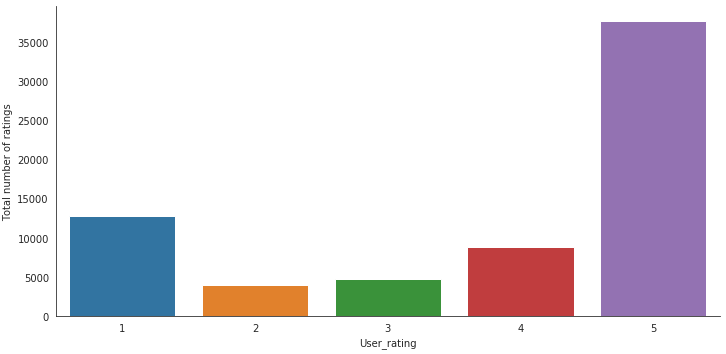

In [7]:
# Check the distribution of the User_rating
with sns.axes_style('white'):
    g = sns.factorplot("User_rating", data=mobiles, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

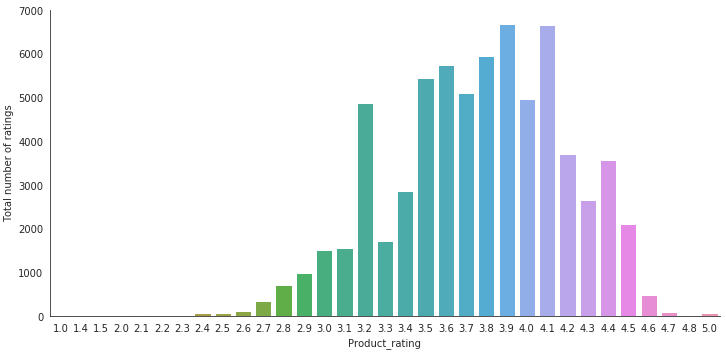

In [8]:
# Check the distribution of the Product_rating
with sns.axes_style('white'):
    g = sns.factorplot("Product_rating", data=mobiles, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Unique Users and products

In [9]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",mobiles.shape[0])
print("Total No of Brands  :", mobiles["brand"].nunique())
print("Total No of products   :", mobiles["productId"].nunique())
print("Total No of Users   :", mobiles["userId"].nunique())

Total data 
--------------------------------------------------

Total no of ratings : 67971
Total No of Brands  : 11
Total No of products   : 720
Total No of Users   : 46377


## Analyzing the rating

In [11]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = mobiles.groupby(by='userId')['User_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
10010      6324
10062       347
10010.0     190
10288       108
13964       107
Name: User_rating, dtype: int64

In [13]:
no_of_rated_products_per_user.describe()

count    46377.000000
mean         1.465489
std         29.492856
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       6324.000000
Name: User_rating, dtype: float64

In [14]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 16



## 1. Popularity Based Recommendation
Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [15]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=mobiles.groupby("productId").filter(lambda x:x['Product_rating'].count() >=50)
new_df

,productId,brand,title,Product_rating,totalReviews,price,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes
126,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Joyful,10122,3,"August 25, 2016",True,Remove previous negative review that was not V...,First of all I need to delete my lst review si...,24.0
127,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Educated Consumer,10123,5,"November 21, 2019",True,"Sound Quality: Impressive, Battery Life: Out O...",I made a three hour international call and it ...,NaN
128,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,mike k,10124,1,"May 1, 2019",True,Dont waste your money on this junk!,Horrible purchase. Came today and first thing ...,1.0
129,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Eddie Gamble,10125,1,"September 5, 2018",True,Wouldn't charge after only a month of use.,After only having this phone for a month it wo...,1.0
130,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7,208,0.0,0.0,Andrew,10126,4,"February 14, 2015",True,Great!,The phone arrived with some scratches on the f...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67964,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,Cindy Cowles,50450,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67965,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,Los Kositos,50451,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,jande,50452,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.0,0.0,2cool4u,50453,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0


Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

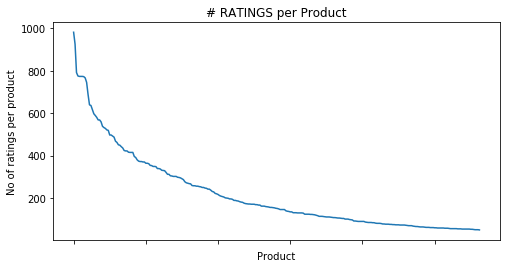

In [16]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Product_rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [17]:
#Average rating of the product 

new_df.groupby('productId')['Product_rating'].mean().head()

productId
B002UHS0UI    2.7
B002WTC1NG    3.6
B0033SFV5A    3.3
B003FCO9XE    2.6
B003P2VNAQ    3.6
Name: Product_rating, dtype: float64

In [18]:
new_df.groupby('productId')['Product_rating'].mean().sort_values(ascending=False).head()

productId
B07K1M36CM    4.6
B07YQ58NPF    4.6
B07YZLRS3Z    4.6
B07YJHXZT6    4.6
B07WW25BSV    4.6
Name: Product_rating, dtype: float64

In [19]:
#Total no of rating for product

new_df.groupby('productId')['Product_rating'].count().sort_values(ascending=False).head()

productId
B00F2SKPIM    981
B00836Y6B2    925
B07FZH9BGV    791
B01D1J9BGU    775
B018OMP8ES    773
Name: Product_rating, dtype: int64

In [20]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Product_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Product_rating'].count())
ratings_mean_count.head()

,Product_rating,rating_counts
productId,,
B002UHS0UI,2.7,207
B002WTC1NG,3.6,348
B0033SFV5A,3.3,56
B003FCO9XE,2.6,77
B003P2VNAQ,3.6,67


In [20]:
ratings_mean_count['rating_counts'].max()

981

<Figure size 576x432 with 0 Axes>

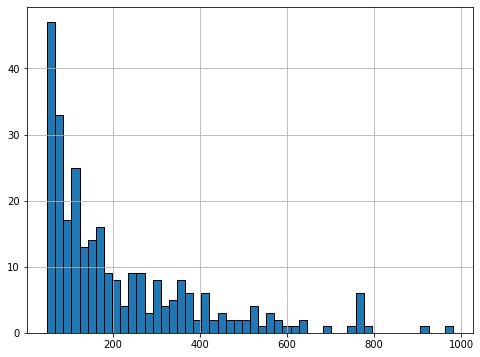

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

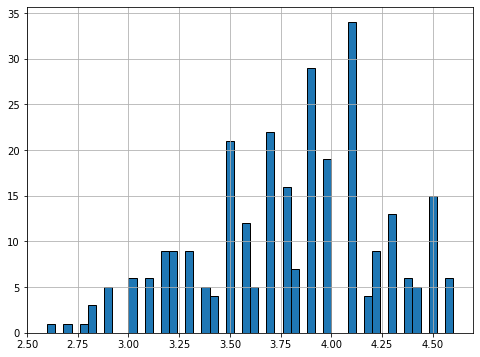

In [22]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Product_rating'].hist(bins=50)


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

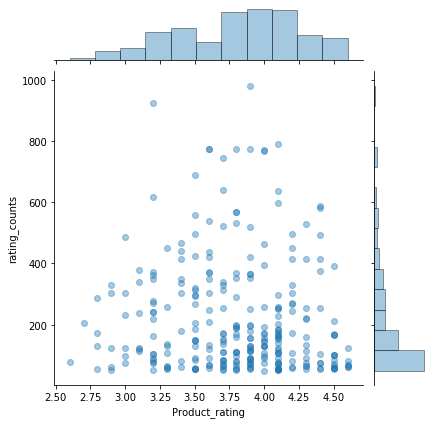

In [23]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Product_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

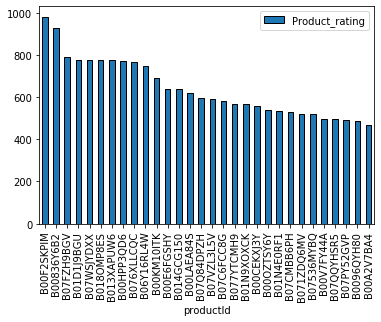

In [24]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Product_rating'].count())
most_popular = popular_products.sort_values('Product_rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

## Data Pre-processing For Model Building:

### Flow Process:

1.Separating price column from mobiles data frame

2.By using sklearn library imputing missing values with the stratergy of Median

3.Concat the imputed pricing column with the existing one

In [4]:
price = mobiles[['price']]
price


from sklearn.impute import SimpleImputer, MissingIndicator
imp = SimpleImputer(missing_values=0, strategy='median')
imp.fit(price)
SimpleImputer()
price = (imp.transform(price))
price = pd.DataFrame(price) 
price.head()

# Concatinating the Imputed price column with the main dataframe 

mb = mobiles.drop(['price'], axis=1)
mb.head()
mb.shape

mobiles_pr = pd.concat([mb, price], axis=1, sort=False)
mobiles_pr.head(5)

mobiles_pr = mobiles_pr.set_axis(['productid', 'brand','title' ,'product_rating','totalReviews','originalprice','name','userid','user_rating','date','verifed','title.1','body','helpfulvotes','price'], axis=1, inplace=False)
mobiles_pr.head(5)


mb_an = mobiles_pr[['productid','brand','title','product_rating','totalReviews','userid','user_rating','price','date','body']]
mb_an

,price
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
67966,948.00
67967,948.00
67968,948.00
67969,478.97


SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='median', verbose=0)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

,0
0,209.67
1,209.67
2,209.67
3,209.67
4,209.67


,productId,brand,title,Product_rating,totalReviews,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Janet,10001,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Luke Wyatt,10002,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Brooke,10003,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,amy m. teague,10004,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,tristazbimmer,10005,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


(67971, 14)

,productId,brand,title,Product_rating,totalReviews,originalPrice,name,userId,User_rating,date,verified,title.1,body,helpfulVotes,0
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Janet,10001,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,209.67
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Luke Wyatt,10002,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,209.67
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Brooke,10003,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,209.67
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,amy m. teague,10004,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,209.67
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,tristazbimmer,10005,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,209.67


,productid,brand,title,product_rating,totalReviews,originalprice,name,userid,user_rating,date,verifed,title.1,body,helpfulvotes,price
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Janet,10001,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,209.67
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Luke Wyatt,10002,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,209.67
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,Brooke,10003,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,209.67
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,amy m. teague,10004,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,209.67
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,0.0,tristazbimmer,10005,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,209.67


,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,"October 11, 2005",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,"January 7, 2004",Due to a software issue between Nokia and Spri...
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,"December 30, 2003","This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,"March 18, 2004","I love the phone and all, because I really did..."
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,"August 28, 2005",The phone has been great for every purpose it ...
...,...,...,...,...,...,...,...,...,...,...
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50452,5,948.00,"August 16, 2019",I love the camera on this phone. The screen is...
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50453,5,948.00,"September 14, 2019",I've been an Xperia user for several years and...
67968,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,11236,5,948.00,"July 14, 2019",buy one more for my cousin
67969,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,55896,5,478.97,"December 24, 2019",Product looks and works like new. Very much re...


## Anova test on product_rating and user_rating: 

### Conclusion from the test:

As the P-value (0.0000006) is non significant, we fail to reject null hypothesis

,df,sum_sq,mean_sq,F,PR(>F)
C(user_rating),4.0,562.898133,140.724533,799.791084,0.0
Residual,67966.0,11958.727496,0.175952,NaN,NaN


42.52826604137587 6.991100419461212e-11


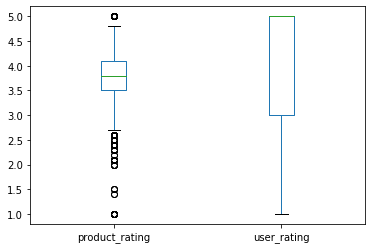

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import scipy.stats as sc

#Anova test of product_rating and user_rating:
mb_an.boxplot(column=['product_rating', 'user_rating'], grid=False)

model = ols('product_rating ~ C(user_rating)', data=mb_an).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

fvalue, pvalue = sc.f_oneway(mb_an['product_rating'], mb_an['user_rating'])
print(fvalue, pvalue)

## Weighted average building recommendation system:

This method helps the user gather a more accurate look at a set of data than normal average alone.By giving the equal weightage to product_rating and pricing we can get the new column as a score based on that score we are come up with top recommendation of mobile products.

In [27]:
mb_an.head(5)
print("mobile:",mb_an.shape)
mb_an.info()

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,"October 11, 2005",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,"January 7, 2004",Due to a software issue between Nokia and Spri...
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,"December 30, 2003","This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,"March 18, 2004","I love the phone and all, because I really did..."
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,"August 28, 2005",The phone has been great for every purpose it ...


mobile: (67971, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67971 entries, 0 to 67970
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productid       67971 non-null  object 
 1   brand           67971 non-null  object 
 2   title           67971 non-null  object 
 3   product_rating  67971 non-null  float64
 4   totalReviews    67971 non-null  int64  
 5   userid          67965 non-null  object 
 6   user_rating     67971 non-null  int64  
 7   price           67971 non-null  float64
 8   date            67971 non-null  object 
 9   body            67971 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.2+ MB


In [28]:
date_sorted_ranking=mb_an.sort_values('date',ascending=False)
date_sorted_ranking.head(5)

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
61071,B07Q84DPZH,Samsung,"Samsung Galaxy A10 32GB (A105M) 6.2"" HD+ Infin...",4.1,874,51877,5,209.67,"September 9, 2019",Easy to set up
64203,B07V3TL48P,OnePlus,OnePlus 6T A6013 128GB Mirror Black - US Versi...,4.4,94,53738,5,332.95,"September 9, 2019","Great Service using TMobile bands 2,4,12,71! P..."
31154,B06XR8G1TX,Apple,"Apple iPhone 6S, 64GB, Space Gray - Fully Unlo...",3.5,394,32227,5,156.88,"September 9, 2019",The charger they provided me is very slow but ...
48691,B07D6TQP6F,Apple,"Apple iPhone X, 256GB, Silver - For AT&T (Rene...",3.9,436,10010,5,476.00,"September 9, 2019",Phone works perfect! Looks brand new ! No scra...
66215,B07WSJYDXX,Motorola,Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-...,3.9,836,54950,1,119.99,"September 9, 2019",Callers can NOT hear me during calls. I have t...


### Recommendation based on scaled price and product_rating(Priority is given 50% to both)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
mb_an_scaled_df=scaling.fit_transform(mb_an[['product_rating','price']])
mb_an_normalized_df=pd.DataFrame(mb_an_scaled_df,columns=['Normalize_product_rating','Normalize_price'])
mb_an_normalized_df.head()

,Normalize_product_rating,Normalize_price
0,0.5,0.208881
1,0.5,0.208881
2,0.5,0.208881
3,0.5,0.208881
4,0.5,0.208881


In [30]:
mb_an_normalized = pd.concat([mb_an, mb_an_normalized_df], axis=1, sort =False)
mb_an_normalized.head()

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body,Normalize_product_rating,Normalize_price
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,"October 11, 2005",I had the Samsung A600 for awhile which is abs...,0.5,0.208881
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,"January 7, 2004",Due to a software issue between Nokia and Spri...,0.5,0.208881
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,"December 30, 2003","This is a great, reliable phone. I also purcha...",0.5,0.208881
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,"March 18, 2004","I love the phone and all, because I really did...",0.5,0.208881
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,"August 28, 2005",The phone has been great for every purpose it ...,0.5,0.208881


In [31]:
mb_an_normalized['score'] = mb_an_normalized['Normalize_product_rating'] * 0.5 + mb_an_normalized['Normalize_price'] * 0.5
mb_an_scored_df = mb_an_normalized.sort_values(['score'], ascending=False)
mb_an_scored_df

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body,Normalize_product_rating,Normalize_price,score
64324,B07V5KS95Y,Samsung,Samsung Galaxy Note 10+ Plus Factory Unlocked ...,4.3,475,20262,1,999.99,"October 5, 2019",Devuelto porque enviaron el equipo equivocado,0.825,1.000000,0.912500
64374,B07V5KS95Y,Samsung,Samsung Galaxy Note 10+ Plus Factory Unlocked ...,4.3,475,53120,5,999.99,"November 10, 2019",Worked perfectly one of the best phones of 2019,0.825,1.000000,0.912500
64376,B07V5KS95Y,Samsung,Samsung Galaxy Note 10+ Plus Factory Unlocked ...,4.3,475,53855,5,999.99,"November 4, 2019","Just awesome piece of machinery, this smartpho...",0.825,1.000000,0.912500
64377,B07V5KS95Y,Samsung,Samsung Galaxy Note 10+ Plus Factory Unlocked ...,4.3,475,53856,5,999.99,"December 11, 2019","Overall, the Note 10 is a beautiful phone whic...",0.825,1.000000,0.912500
64378,B07V5KS95Y,Samsung,Samsung Galaxy Note 10+ Plus Factory Unlocked ...,4.3,475,53857,5,999.99,"November 17, 2019",Beast.,0.825,1.000000,0.912500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,B00QHJTOK0,Samsung,Samsung Galaxy Centura SCH-S738C - (Net10),1.0,1,22102,1,209.67,"May 14, 2018",I have this phone...it is garbage. Stay away. ...,0.000,0.208881,0.104440
37997,B0743J3P8G,Samsung,Samsung Galaxy Tab 4 T237P 7.0-inch 16GB Sprin...,1.0,1,37009,1,138.95,"October 14, 2017",Realized when i place my sim in the tablet it ...,0.000,0.138089,0.069045
30914,B06XJCHZPW,Samsung,Samsung Galaxy S6 Edge G925P 32GB Gold - Sprin...,1.0,1,10010,1,124.95,"September 7, 2019",aaah,0.000,0.124075,0.062038
63220,B07RSSVMH8,Motorola,Motorola G7 Play 32GB GSM Nano-SIM Phone w/ 13...,1.0,1,53185,1,121.08,"November 1, 2019","If you are looking for a US VERSION, dont buy ...",0.000,0.120201,0.060101


<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Top rated product')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'productid')

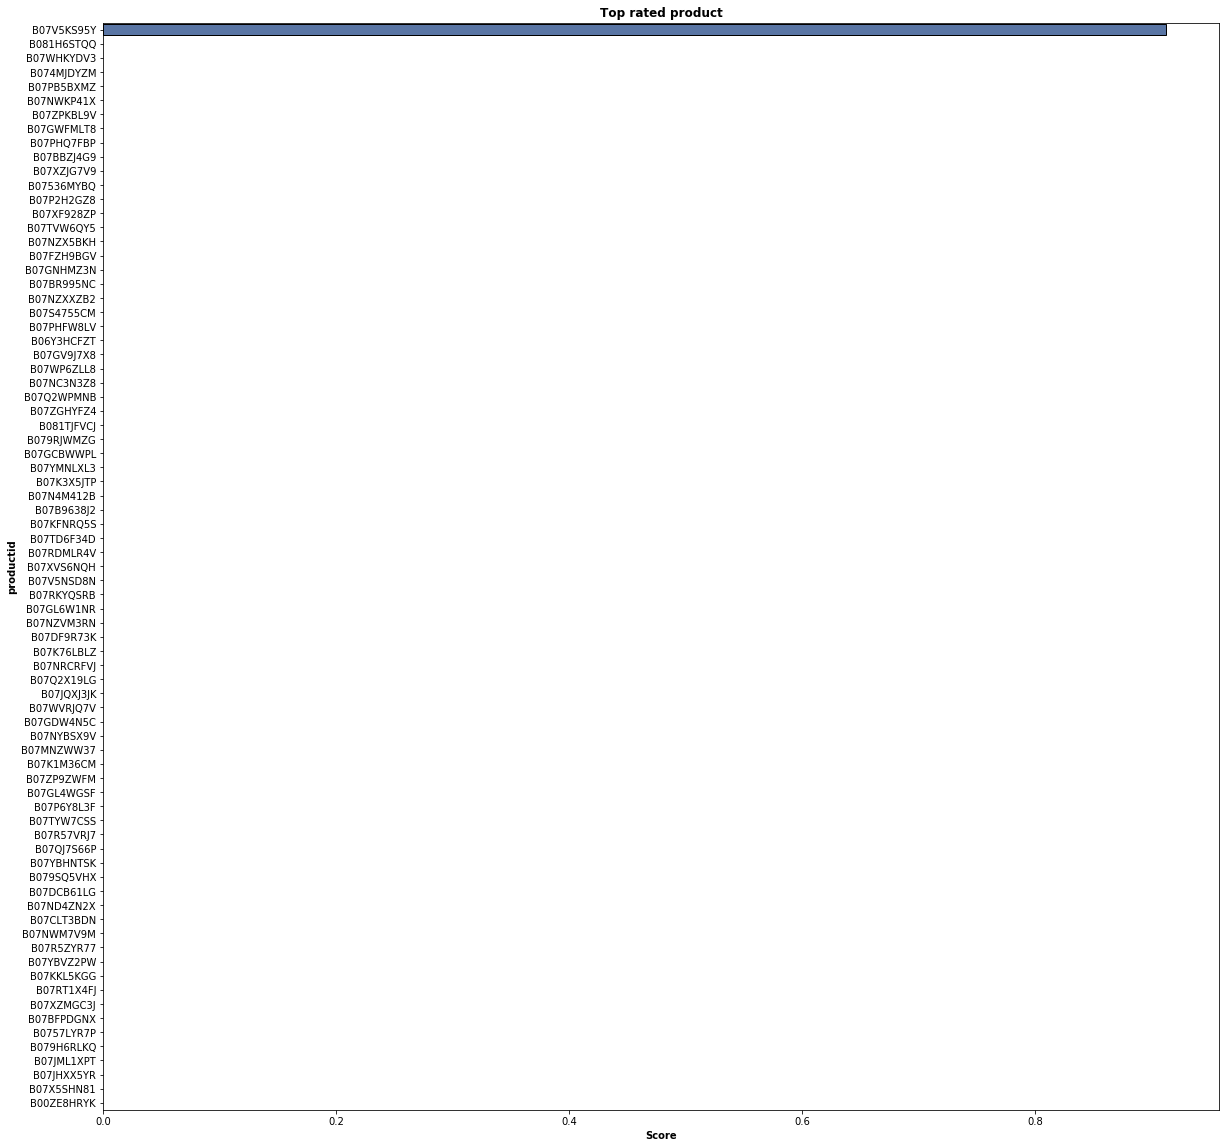

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

scored_df = mb_an_scored_df.sort_values('score', ascending=False)
plt.figure(figsize=(20,20))
ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['productid'].head(5000), data=scored_df, palette='deep')

plt.title('Top rated product', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('productid', weight='bold')

plt.savefig('scored_mobiles.png')

### Top productid based on weighted average score 

# Content based recommendation system:

Now lets make a recommendations based on if our user gives us one product id, our goal is to recommend the new product to the users based on previous review comments by other users. 

NLP Implementation for the text data to gain insights.

Note: As the first of step of digging into the model we took some samples out of it insted of taking all the data. 

In [33]:
mb = mb_an.sample(n=15000, random_state=50)
mb = mb.reset_index()
mb = mb.drop(columns = ['index'])
mb.head()

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B06XRG6S73,Apple,"Apple iPhone 6S, 16GB, Rose Gold - For AT&T / ...",3.7,379,32323,5,143.57,"February 28, 2019",Reviews were mixed so I thought I would leave ...
1,B07KX1L519,Samsung,Samsung Galaxy A50 A505G 64GB Duos GSM Unlocke...,4.1,125,48427,5,299.50,"August 24, 2019",I love my phone
2,B007X6FFLS,Samsung,Samsung a157 GoPhone (AT&T),3.4,305,12121,1,97.69,"October 14, 2013",I've owned so many cell phones over the decade...
3,B00V7FY44A,Samsung,"Samsung Galaxy S6 Edge, White Pearl 32GB (Veri...",3.5,505,22439,1,209.67,"October 27, 2017",This phone does not hold charge....i have to t...
4,B07455VT9F,Samsung,Samsung J327V Eclipse Verizon (Black),4.2,16,37018,5,139.00,"April 30, 2019",Good quality phone. Very happy with it.


In [34]:
#Count of each product:
mb.productid.value_counts()

B00F2SKPIM    205
B00836Y6B2    204
B013XAPUW6    183
B00HPP3QD6    178
B076XLLCQC    177
             ... 
B07T9G946J      1
B07TDNCVW2      1
B01DZJFWWS      1
B07CJKNL9R      1
B07HXHPNKH      1
Name: productid, Length: 620, dtype: int64

In [35]:
#Check for missing values
print('Number of missing values across columns: \n',mb_an.isnull().sum())

Number of missing values across columns: 
 productid         0
brand             0
title             0
product_rating    0
totalReviews      0
userid            6
user_rating       0
price             0
date              0
body              0
dtype: int64


In [36]:
mb['body'].head

<bound method NDFrame.head of 0        Reviews were mixed so I thought I would leave ...
1                                          I love my phone
2        I've owned so many cell phones over the decade...
3        This phone does not hold charge....i have to t...
4                  Good quality phone. Very happy with it.
                               ...                        
14995                          The biggest mistake I made.
14996    4.5 out of 5. So I come from an iPhone perspec...
14997    I don't understand how something is so good at...
14998    The phone was exactly what it says. It is not ...
14999    I had no problem with the device and also with...
Name: body, Length: 15000, dtype: object>

## Count Vectorizer:

From the Sklearn library we import count vectorizer, It Convert a collection of raw documents to a matrix of count vectorizer features. If 'filename', the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
count_matrix = cv.fit_transform(mb['body'])

sim = cosine_similarity(count_matrix)
sim

array([[1.        , 0.17817416, 0.4540206 , ..., 0.15152288, 0.51754917,
        0.2589662 ],
       [0.17817416, 1.        , 0.16439899, ..., 0.        , 0.12909944,
        0.        ],
       [0.4540206 , 0.16439899, 1.        , ..., 0.18641093, 0.40325254,
        0.30633943],
       ...,
       [0.15152288, 0.        , 0.18641093, ..., 1.        , 0.12198751,
        0.05634362],
       [0.51754917, 0.12909944, 0.40325254, ..., 0.12198751, 1.        ,
        0.20207259],
       [0.2589662 , 0.        , 0.30633943, ..., 0.05634362, 0.20207259,
        1.        ]])

In [39]:
m = 'B00HPP3QD6'
m in mb['productid'].unique()

i = mb.loc[mb['productid'] == m].index[0]
print(i)

lst = list(enumerate(sim[i]))
lst = sorted(lst, key = lambda x: x[1],reverse = True)
lst = lst[1:11]
lst

True

46


[(5999, 0.6767922651469651),
 (1954, 0.6722558419561678),
 (5009, 0.6711011724845346),
 (14101, 0.6696779483767715),
 (10853, 0.6693668262260599),
 (9675, 0.6674425411850051),
 (11475, 0.6656385943684707),
 (1229, 0.6622826951995325),
 (11063, 0.6596330030738444),
 (2209, 0.6584882542165738)]

The above products are more recommended based on review score

## Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In these below model building we are approach two things:

1.Recommendations based on Product_rating:

When user wants give the priority to product rating then our recommendations falls under the above category.
  

2.Recommendations based on Pricing:
    
When user wants give the priority to price then our recommendations falls under the above category.

### 1.Recommendations based on product_rating:

In [106]:
mb_an

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,2005-10-11,I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,2004-01-07,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,2003-12-30,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,2004-03-18,"I love the phone and all, because I really did..."
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,2005-08-28,The phone has been great for every purpose it ...
...,...,...,...,...,...,...,...,...,...,...
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50452,5,948.00,2019-08-16,I love the camera on this phone. The screen is...
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50453,5,948.00,2019-09-14,I've been an Xperia user for several years and...
67968,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,11236,5,948.00,2019-07-14,buy one more for my cousin
67969,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,55896,5,478.97,2019-12-24,Product looks and works like new. Very much re...


In [107]:
#Sorting the values of totalReviews in descending order:
mb_an.sort_values('totalReviews', ascending=False).head()

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
7951,B00F2SKPIM,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9,983,16842,5,209.67,2016-07-14,Amazingly this works with Tracfone. Before we ...
8838,B00F2SKPIM,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9,983,17502,5,209.67,2014-06-30,Best phone I've ever owned so far. I wish Veri...
8836,B00F2SKPIM,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9,983,12737,4,209.67,2015-03-04,"So far, so good. Enjoying the update from my o..."
8835,B00F2SKPIM,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9,983,17501,4,209.67,2013-12-29,At first I wasn't sure if I liked it. The phon...
8834,B00F2SKPIM,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9,983,17500,4,209.67,2013-12-08,Love the size of the screen. Doesn't feel sill...


In [108]:
#Allowing the products when the product rating is above 2.0:
counts = mb_an['product_rating'].value_counts()
mb = mb_an[mb_an['product_rating'].isin(counts[counts >= 2.0].index)]
mb

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,2005-10-11,I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,2004-01-07,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,2003-12-30,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,2004-03-18,"I love the phone and all, because I really did..."
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,2005-08-28,The phone has been great for every purpose it ...
...,...,...,...,...,...,...,...,...,...,...
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50452,5,948.00,2019-08-16,I love the camera on this phone. The screen is...
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50453,5,948.00,2019-09-14,I've been an Xperia user for several years and...
67968,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,11236,5,948.00,2019-07-14,buy one more for my cousin
67969,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,55896,5,478.97,2019-12-24,Product looks and works like new. Very much re...


## From Scipy.Sparse import Csr_Matrix: 

The Csr_Matrix is used to store matrix M by three-dimensional(one-dimenssional)arrays 

In [109]:
from scipy.sparse import csr_matrix
mb_rating = mb.drop_duplicates(['productid', 'userid'])
mb_rating_pivot = mb_rating.pivot(index = 'productid', columns = 'userid', values = 'product_rating').fillna(0)
mb_rating_pivot

userid,10008,10010,10016,10022,10039,10043,10048,10062,10064,10079,...,54485,54486,54487,54488,54489,54490,54491,54492,54493,54494
productid,,,,,,,,,,,,,,,,,,,,,
B0000SX2UC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0009N5L7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000SKTZ0S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001AO4OUC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001DCJAJG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07ZPKZSSC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B07ZQSGP53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B081H6STQQ,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## From sklearn.Neighbors import K-NearestNeighbors: 

The K-NN models use Euclidean or Manhattan distance as the go-to distance metric. One distance metric that is seldom used is cosine similarity and it caluculate the distnace between nearest neighbors and suggest the best recommendations.

In [110]:
from sklearn.neighbors import NearestNeighbors
mb_rating_matrix = csr_matrix(mb_rating_pivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(mb_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [111]:
query_index = mb_rating_pivot.index.get_loc('B001DCJAJG')
print(query_index)
distances, indices = model_knn.kneighbors(mb_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)


4


In [112]:
mb_rating_pivot.index[query_index]

'B001DCJAJG'

In [113]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(mb_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, mb_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for B001DCJAJG:

1: B07T9G946J, with distance of 0.7113248654051871:
2: B0735HPCB1, with distance of 0.882148869802242:
3: B07J62YCWB, with distance of 0.8908910548820038:
4: B01BLSX96G, with distance of 0.8908910548820038:
5: B07L78G3D2, with distance of 0.8979379273840342:
6: B01CR1FQMG, with distance of 0.9037749551350623:
7: B078KGP5K5, with distance of 0.9037749551350623:
8: B07NGDHMKL, with distance of 0.9037749551350623:
9: B07H8QMZWV, with distance of 0.9087129070824723:
10: B00V7FXCZ2, with distance of 0.9087129070824723:


### The above productsid are best recommendations accroding to given input productid

### 2.Recommendations based on price:

In [114]:
from scipy.sparse import csr_matrix
mb_rating = mb.drop_duplicates(['productid', 'userid'])
mb_rating_pivots = mb_rating.pivot(index = 'productid', columns = 'userid', values = 'price').fillna(0)
mb_rating_pivots

userid,10008,10010,10016,10022,10039,10043,10048,10062,10064,10079,...,54485,54486,54487,54488,54489,54490,54491,54492,54493,54494
productid,,,,,,,,,,,,,,,,,,,,,
B0000SX2UC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0009N5L7K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000SKTZ0S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001AO4OUC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001DCJAJG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07ZPKZSSC,0.0,949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B07ZQSGP53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B081H6STQQ,0.0,948.0,0.0,948.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
mb_rating_matrix = csr_matrix(mb_rating_pivots.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(mb_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [116]:
query_index = mb_rating_pivots.index.get_loc('B07YMNLXL3')
print(query_index)
distances, indices = model_knn.kneighbors(mb_rating_pivots.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)


695


In [117]:
mb_rating_pivot.index[query_index]

'B07YMNLXL3'

In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(mb_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, mb_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for B07YMNLXL3:

1: B07ZPKZSSC, with distance of 0.9226176767465863:
2: B07WW25BSV, with distance of 0.9600399400998253:
3: B07XWVPRWZ, with distance of 0.9613088383732932:
4: B07Y4YJ98Z, with distance of 0.9702155298927486:
5: B07YZLRS3Z, with distance of 0.9707522309712938:
6: B07YJHXZT6, with distance of 0.9707522309712938:
7: B07Z8BL2VW, with distance of 0.9707522309712938:
8: B07ZDJCL76, with distance of 0.97384000010464:
9: B07XVZXR5Y, with distance of 0.97384000010464:
10: B07W7VBHRC, with distance of 0.9742058922488621:


### The above productsid are best recommendations accroding to given input price

# Apriori algoritham:

In [57]:
!pip install mlxtend

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
mb_an

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,"October 11, 2005",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,"January 7, 2004",Due to a software issue between Nokia and Spri...
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,"December 30, 2003","This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,"March 18, 2004","I love the phone and all, because I really did..."
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,"August 28, 2005",The phone has been great for every purpose it ...
...,...,...,...,...,...,...,...,...,...,...
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50452,5,948.00,"August 16, 2019",I love the camera on this phone. The screen is...
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50453,5,948.00,"September 14, 2019",I've been an Xperia user for several years and...
67968,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,11236,5,948.00,"July 14, 2019",buy one more for my cousin
67969,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,55896,5,478.97,"December 24, 2019",Product looks and works like new. Very much re...


In [8]:
len(mb_an['product_rating'].unique())

33

In [9]:
mb_count = mb_an.groupby(by="productid")['product_rating'].count().reset_index().rename(columns={'product_rating':'totalRatings'})[['productid','totalRatings']]
mb_count

,productid,totalRatings
0,B0000SX2UC,14
1,B0009N5L7K,7
2,B000SKTZ0S,22
3,B001AO4OUC,21
4,B001DCJAJG,12
...,...,...
715,B07ZPKZSSC,1
716,B07ZQSGP53,3
717,B081H6STQQ,59
718,B081TJFVCJ,1


In [10]:
mb_count.shape[0]

720

In [11]:
mb_total = pd.merge(mb_an,mb_count,on='productid',how='left')
mb_total

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body,totalRatings
0,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10001,3,209.67,2005-10-11,I had the Samsung A600 for awhile which is abs...,14
1,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10002,1,209.67,2004-01-07,Due to a software issue between Nokia and Spri...,14
2,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10003,5,209.67,2003-12-30,"This is a great, reliable phone. I also purcha...",14
3,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10004,3,209.67,2004-03-18,"I love the phone and all, because I really did...",14
4,B0000SX2UC,0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0,14,10005,4,209.67,2005-08-28,The phone has been great for every purpose it ...,14
...,...,...,...,...,...,...,...,...,...,...,...
67966,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50452,5,948.00,2019-08-16,I love the camera on this phone. The screen is...,59
67967,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,50453,5,948.00,2019-09-14,I've been an Xperia user for several years and...,59
67968,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,11236,5,948.00,2019-07-14,buy one more for my cousin,59
67969,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,55896,5,478.97,2019-12-24,Product looks and works like new. Very much re...,1


In [12]:
mb_count['totalRatings'].describe()

count    720.000000
mean      94.404167
std      152.824530
min        1.000000
25%        9.000000
50%       28.000000
75%      108.250000
max      981.000000
Name: totalRatings, dtype: float64

In [13]:
mb_count['totalRatings'].quantile(np.arange(.6,1,0.01))

0.60     47.00
0.61     50.59
0.62     54.00
0.63     55.00
0.64     58.00
0.65     59.35
0.66     62.00
0.67     66.00
0.68     71.92
0.69     74.11
0.70     77.30
0.71     82.98
0.72     89.04
0.73     92.00
0.74    104.00
0.75    108.25
0.76    113.44
0.77    122.63
0.78    129.82
0.79    135.00
0.80    146.00
0.81    156.00
0.82    164.90
0.83    171.77
0.84    182.92
0.85    196.45
0.86    213.70
0.87    242.00
0.88    255.44
0.89    269.82
0.90    298.40
0.91    314.61
0.92    343.32
0.93    364.00
0.94    389.46
0.95    422.10
0.96    472.56
0.97    529.72
0.98    593.96
0.99    770.86
Name: totalRatings, dtype: float64

In [14]:
votes_count_threshold = 20
ratings_top = mb_total.query('totalRatings > @votes_count_threshold')

In [15]:
ratings_top.shape

(65629, 11)

In [16]:
ratings_top.head()

,productid,brand,title,product_rating,totalReviews,userid,user_rating,price,date,body,totalRatings
21,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,10022,4,99.99,2010-09-17,I bought this phone to replace an LG phone tha...,22
22,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,10023,1,99.99,2017-05-13,I purchased this phone for my AT&T phone repla...,22
23,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,10024,1,99.99,2019-03-13,The phone did not come with a charger and didn...,22
24,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,10025,5,99.99,2017-05-01,SERVED ME WELL AS A BACK UP PHONE.,22
25,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,10026,3,99.99,2009-02-10,I got this phone just as secondary cell phone....,22


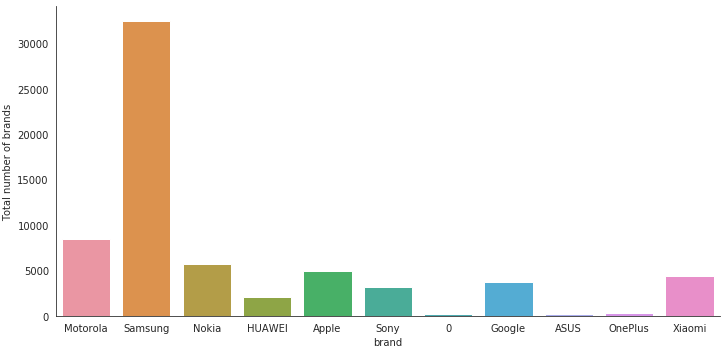

In [17]:
with sns.axes_style('white'):
    g = sns.factorplot("brand", data=ratings_top, aspect=2.0,kind='count')
    g.set_ylabels("Total number of brands")

In [19]:
if not ratings_top[ratings_top.duplicated(['userid','productid'])].empty:
    ratings_top = ratings_top.drop_duplicates(['userid','productid'])
ratings_top.shape

(58813, 11)

In [20]:
ratings_top.productid.value_counts()

B00836Y6B2    882
B00F2SKPIM    844
B00HPP3QD6    724
B07FZH9BGV    696
B07WSJYDXX    680
             ... 
B001AO4OUC     20
B07QTLB1D9     20
B07S4755CM     20
B07J2Q68N4     20
B06XRN4RWL     19
Name: productid, Length: 402, dtype: int64

In [96]:
mb_for_knn = ratings_top.pivot(index='productid',columns='userid',values='product_rating').fillna(0)
mb_for_knn

userid,10008,10010,10016,10022,10039,10043,10048,10062,10064,10079,...,54485,54486,54487,54488,54489,54490,54491,54492,54493,54494
productid,,,,,,,,,,,,,,,,,,,,,
B000SKTZ0S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001AO4OUC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0029F2O3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002UHS0UI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002WTC1NG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B07YMNLXL3,4.2,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B07YQ58NPF,0.0,4.6,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B07YZLRS3Z,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [98]:
mb_for_ar = mb_for_knn.T.applymap(encode_units)
mb_for_ar

productid,B000SKTZ0S,B001AO4OUC,B0029F2O3A,B002UHS0UI,B002WTC1NG,B0033SFV5A,B003FCO9XE,B003P2VNAQ,B0046REOWS,B004C7NVD0,...,B07XVZXR5Y,B07Y4YJ98Z,B07Y8XK9GC,B07Y8YWTFL,B07YJHXZT6,B07YMNLXL3,B07YQ58NPF,B07YZLRS3Z,B07ZDJCL76,B081H6STQQ
userid,,,,,,,,,,,,,,,,,,,,,
10008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10010,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
10016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
frequent_product = apriori(mb_for_ar, min_support=0.009, use_colnames=True)

In [105]:
rules = association_rules(frequent_product, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B013XAPUW6),(B018OMP8ES),0.014237,0.014237,0.014237,1.0,70.241002,0.014034,inf
1,(B018OMP8ES),(B013XAPUW6),0.014237,0.014237,0.014237,1.0,70.241002,0.014034,inf
2,(B077YTCMH9),(B01N9XOXCK),0.010828,0.010828,0.010828,1.0,92.353909,0.010711,inf
3,(B01N9XOXCK),(B077YTCMH9),0.010828,0.010828,0.010828,1.0,92.353909,0.010711,inf
